# Intro

The SAS Scripting Wrapper for Analytics Transfer (SWAT) is a package developed by SAS to allow the Python interface to access the SAS Viya platform and use its processing power. What is SAS Viya? It is a cloud-ready, in-memory analytics engine using SAS Cloud Analytic Services, or CAS for short.

So, if you have no SAS background, don’t worry, the following steps demonstrate how you can use your Python skills to utilize and control analytical routines in SAS Viya.

# Packages

+ To allow connections to SAS Viya through SWAT, the following additional packages are required.
+ %matplotlib inline will make your plot outputs appear and be stored within the notebook.
+ SWAT.OPTIONS.CAS.PRINT_MESSAGES is a SWAT function that can be used to turn on or off message printing of CAS actions and results.

In [69]:
import swat
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True

# Connection

+ Connect to CAS using the CASHOST, CASPORT, and SAS_VIYA_TOKEN arguments from the operating system environment.

In [70]:
conn = swat.CAS(os.environ.get("CASHOST"), os.environ.get("CASPORT"),None,os.environ.get("SAS_VIYA_TOKEN"))

+ To verify that a connection is now made, the serverstatus CAS action can be run on the CAS session to display details about the current SAS Viya session.

In [71]:
conn.serverstatus()

NOTE: Grid node action status report: 1 nodes, 8 total actions executed.


[About]

 {'CAS': 'Cloud Analytic Services',
  'Version': '3.04',
  'VersionLong': 'V.03.04M0P07122018',
  'Copyright': 'Copyright © 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2019-08-10T15:36:14Z',
  'System': {'Hostname': 'pdcesx27012',
   'OS Name': 'Linux',
   'OS Family': 'LIN X64',
   'OS Release': '3.10.0-693.el7.x86_64',
   'OS Version': '#1 SMP Tue Aug 22 21:09:27 UTC 2017',
   'Model Number': 'x86_64',
   'Linux Distribution': 'CentOS Linux release 7.4.1708 (Core)'},
  'license': {'site': 'DEMOCENTER - Viya For Learners',
   'siteNum': 70180938,
   'expires': '05Dec2019:00:00:00',
   'gracePeriod': 45,
   'warningPeriod': 45,
   'maxCPUs': 9999}}

[server]

 Server Status
 
    nodes  actions
 0      1        8

[nodestatus]

 Node Status
 
                         name        role  uptime  running  stalled
 0  pdcesx27012.exnet.sas.com  controller   0.251        0        0

+ Elapsed: 0.000268s, user: 0.000138s, sys: 0.00012s, mem: 0.312mb

+ Youc can change the CAS time-out for the session, for example to 12 hours.

In [72]:
mytime = 60*60*12
conn.session.timeout(time=mytime)
conn.session.sessionStatus()

[state]

 'Connected'

[number of Connections]

 1

[Timeout]

 43200

[ActionStatus]

 'Action is active'

[Authenticated]

 'Yes'

[locale]

 'en_US'

+ Elapsed: 0.000121s, user: 6.1e-05s, sys: 5.1e-05s, mem: 0.212mb

# Data

+ Data can be already in to CAS. Use fileinfo method to explore the public library and see what datasets are already avilable for you. 
+ To work on a table a CASTable statement needs to be run. This will create a data table object.

In [73]:
conn.fileinfo(caslib='public')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rw-r--r--,v4e.admin@v4e.sas.com,sas,predef_svrtdist.sashdat,78872,NONE,2019-07-18T09:14:53-04:00,1.879075e+09
1,-rwxr-xr-x,v4e.admin@v4e.sas.com,sas,PARKS_LOC.sashdat,46665928,NONE,2019-07-15T08:58:35-04:00,1.878815e+09
2,-rwxr-xr-x,v4e.admin@v4e.sas.com,sas,FACILITY_TOY_AMERICA.sashdat,15280912,NONE,2019-07-15T09:02:47-04:00,1.878815e+09
3,-rwxr-xr-x,Sharon.Wu@sas.com,v4e_users,MQHACK_NEW.sashdat,5846216,NONE,2019-07-24T21:05:44-04:00,1.879636e+09


In [74]:
MQHACK = conn.CASTable(name='MQHACK_NEW', caslib='public')

+ If data is not available, you can load new data by yourself. For example load the hmeq.csv data set onto the server (use a folder path where you store the data) and create a data table object called castbl.
+ Successfull upload will be confirmed by 2 NOTE's. The CASUSER library is a library which will make the data set available to the current user only.

In [75]:
castbl = conn.read_csv(os.environ.get("HOME")+"/Courses/EVMLOPRC/DATA/hmeq.csv", casout = dict(name="hmeq", replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table HMEQ in caslib CASUSER(vankat.petr@outlook.com).
NOTE: The table HMEQ has been created in caslib CASUSER(vankat.petr@outlook.com) from binary data uploaded to Cloud Analytic Services.


+ It is possible to move data between libraries. For example, once you are done with data analysis/manipulation etc., you can promote the final set to to the public library (target = the name of the new CAS table within the target library).

In [76]:
#conn.promote(name=castbl, targetlib='public', target='HMEQ_MODIFIED')

+ If required, you can bring data locally. You can use the type() function in Python to determine where the data is located. Data on the CAS server will have a type or class of CASTable, and data on the client will have a type or class of casDataFrame or sasDataFrame depending on how it was created.

In [77]:
df = MQHACK.to_frame()

In [78]:
display(type(MQHACK))
display(type(df))

swat.cas.table.CASTable

swat.dataframe.SASDataFrame

# SWAT

+ To find out available functions in SWAT, use dir() method. 
+ You can use the Help function to load documentation for a function.

In [79]:
funcs = dir(swat)
funcs[:5]
#help("swat.CAS")

['CAS', 'CASTable', 'SASDataFrame', 'SASFormatter', 'SWATCASActionError']

### Data Exploration
+ Use SWAT functions to explore the dataset.

In [80]:
display(castbl.info())
castbl.describe(include=['numeric', 'character'])

CASTable('HMEQ', caslib='CASUSER(vankat.petr@outlook.com)')
Data columns (total 13 columns):
            N   Miss     Type
BAD      5960  False   double
LOAN     5960  False   double
MORTDUE  5442   True   double
VALUE    5848   True   double
REASON   5708   True  varchar
JOB      5681   True  varchar
YOJ      5445   True   double
DEROG    5252   True   double
DELINQ   5380   True   double
CLAGE    5652   True   double
NINQ     5450   True   double
CLNO     5738   True   double
DEBTINC  4693   True   double
dtypes: double(11), varchar(2)
data size: 785334
vardata size: 70134
memory usage: 785456


None

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960,5960,5442,5848,5708,5681,5445,5252,5380,5652,5450,5738,4693
unique,2,540,5053,5381,2,6,99,11,14,5314,16,62,4693
top,0,15000,42000,60000,DebtCon,Other,0,0,0,206.967,0,16,203.312
freq,4771,105,11,15,3928,2388,415,4527,4179,7,2531,316,1
mean,0.199497,18608,73760.8,101776,NaN,NaN,8.92227,0.25457,0.449442,179.766,1.18606,21.2961,33.7799
std,0.399656,11207.5,44457.6,57385.8,NaN,NaN,7.57398,0.846047,1.12727,85.8101,1.72867,10.1389,8.60175
min,0,1100,2063,8000,DebtCon,Mgr,0,0,0,0,0,0,0.524499
25%,0,11100,46268,66069,NaN,NaN,3,0,0,115.103,0,15,29.14
50%,0,16300,65019,89235.5,NaN,NaN,7,0,0,173.467,1,20,34.8183
75%,0,23300,91491,119832,NaN,NaN,13,0,0,231.575,2,26,39.0031


### Data Visualisation
+ Standard Python packages can be used to visualize data.
+ For example matplotlib functionality combined with SWAT methods can be used.

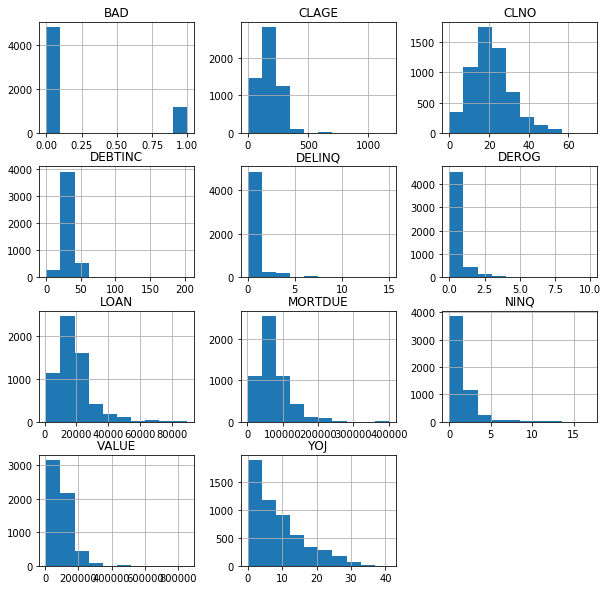

In [81]:
castbl.hist(figsize=(10,10))
plt.show()

### Data Manipulation
+ Python libraries like Pandas can be used.

In [82]:
#mean debt value by reason type
castbl.groupby('REASON').VALUE.mean()

REASON
            95919.280172
DebtCon    102172.956197
HomeImp    101675.094662
Name: VALUE, dtype: float64

### Model Building
+ You can use SWAT to build models like decision trees, regression etc.
+ Python packages like SciKit-Learn are also available.